# Day5 Lunch

## Question 1 & 2

1. Read the abstract for this paper to understand the context.

1. Use pandas to load two data tables from this paper

In [2]:
#Load modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [4]:
#load both data sets from the paper
#downloaded file and changed to csv
df = pd.read_csv("/Users/cmdb/Downloads/aau1043_dnm.csv")
df

,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger
0,chr1,241097646,C,T,99379,father,paternal_crossover,confirmed
1,chr10,29202943,A,G,8147,father,maternal_crossover,PCR failed
2,chr11,129441657,C,T,5410,mother,maternal_crossover,confirmed
3,chr13,96867147,A,G,46025,father,paternal_crossover,confirmed
4,chr17,50609998,C,T,144769,mother,maternal_crossover,confirmed
...,...,...,...,...,...,...,...,...
26426,chr9,137374330,C,T,54383,father,NaN,NaN
26427,chr9,137396508,C,T,39729,father,NaN,NaN
26428,chr9,137633973,C,A,17904,mother,NaN,NaN
26429,chr9,137889777,G,A,80108,father,NaN,NaN


In [5]:
age_par = pd.read_csv("/Users/cmdb/Downloads/aau1043_parental_age.csv")
age_par

,Proband_id,Father_age,Mother_age
0,675,31,36
1,1097,19,19
2,1230,30,28
3,1481,32,20
4,1806,38,34
...,...,...,...
391,153657,27,23
392,154565,36,30
393,154621,19,18
394,154810,32,28


## Question 3

Count the number of de novo mutations per proband. The Phase_combined column records the inferred parent of origin of the de novo mutation. Break the counts of de novo mutations down into maternally inherited, paternally inherited, and total de novo mutations (including of unknown parental origin). Store these counts in a new pandas dataframe with columns: Proband_id, pat_dnm, mat_dnm, tot_dnm.

In [20]:
roi = df['Phase_combined'] == 'mother'
df_maternal = df[roi]
value_mat = df_maternal['Proband_id'].value_counts()
value_mat

112917    32
13191     31
101332    30
142988    29
14991     28
          ..
93086      4
130614     3
37789      3
113829     3
121087     1
Name: Proband_id, Length: 396, dtype: int64

In [10]:
roi = df['Phase_combined'] == 'father'
df_paternal = df.loc[roi]
df_paternal

,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger
0,chr1,241097646,C,T,99379,father,paternal_crossover,confirmed
1,chr10,29202943,A,G,8147,father,maternal_crossover,PCR failed
3,chr13,96867147,A,G,46025,father,paternal_crossover,confirmed
6,chr2,8091216,C,T,24464,father,paternal_crossover,confirmed
9,chr20,54477057,G,A,5494,father,paternal_crossover,confirmed
...,...,...,...,...,...,...,...,...
26425,chr9,137267012,T,C,96471,father,NaN,NaN
26426,chr9,137374330,C,T,54383,father,NaN,NaN
26427,chr9,137396508,C,T,39729,father,NaN,NaN
26429,chr9,137889777,G,A,80108,father,NaN,NaN


In [ ]:
df_maternal -pd.DataFrame
roi = df['Phase_combined'] == 'mother'
df_maternal = df[roi]
value_mat = df_maternal['Proband_id'].value_counts()



counts_df = df[df["Proband_id"], df["Phase_combined"] == "father", df["Phase_combined"] == "mother",  ]

In [ ]:
df.columns = ['Proband_id', 'pat_dmn', 'mat_dnm', 'tot_dnm']
df['Proband_id'] = ['new', 'column', 'data']
df['Proband_id'] = ['new', 'column', 'data']

In [24]:
roi = df['Phase_combined'] == 'mother'
df_maternal = df.loc[roi]
maternal = df_maternal['Proband_id'].value_counts()
df_maternal = pd.DataFrame(maternal)
df_maternal

,Proband_id
112917,32
13191,31
101332,30
142988,29
14991,28
...,...
93086,4
130614,3
37789,3
113829,3


In [30]:
roi2 = df['Phase_combined'] == 'father'
df_paternal = df.loc[roi2]
paternal = df_paternal['Proband_id'].value_counts()
paternal

91410     111
114094     98
111288     93
99984      91
64166      88
         ... 
76504      27
1097       26
13990      25
36430      25
37789      17
Name: Proband_id, Length: 396, dtype: int64

In [31]:
roi2 = df['Phase_combined'] == 'father'
df_paternal = df.loc[roi2]
paternal = df_paternal['Proband_id'].value_counts()
df_paternal = pd.DataFrame(df_paternal['Proband_id'].value_counts())
df_paternal

,Proband_id
91410,111
114094,98
111288,93
99984,91
64166,88
...,...
76504,27
1097,26
13990,25
36430,25


In [27]:
Proband_total = df['Proband_id'].value_counts()
total = pd.DataFrame(total)
total

,Proband_id
91410,122
114094,121
111288,115
8147,114
88246,113
...,...
121087,37
62630,34
76504,34
37789,34


In [ ]:
#total dmn
Proband_total = df['Proband_id'].value_counts()
total = pd.DataFrame(total)
total

#paternal dmn
roi2 = df['Phase_combined'] == 'father'
df_paternal = df.loc[roi2]
paternal = df_paternal['Proband_id'].value_counts()
df_paternal = pd.DataFrame(paternal)
df_paternal

#maternal dmn
roi = df['Phase_combined'] == 'mother'
df_maternal = df.loc[roi]
maternal = df_maternal['Proband_id'].value_counts()
df_maternal = pd.DataFrame(maternal)
df_maternal

In [32]:
#adding the maternal counts to paternal
df_paternal['mat_dmn'] = df_maternal
df_paternal

,Proband_id,mat_dmn
91410,111,10
114094,98,22
111288,93,21
99984,91,12
64166,88,16
...,...,...
76504,27,5
1097,26,12
13990,25,7
36430,25,16


In [33]:
#adding total counts to paternal
df_paternal['tot_dmn'] = total
df_paternal

,Proband_id,mat_dmn,tot_dmn
91410,111,10,122
114094,98,22,121
111288,93,21,115
99984,91,12,103
64166,88,16,105
...,...,...,...
76504,27,5,34
1097,26,12,39
13990,25,7,33
36430,25,16,42


In [34]:
#changing column names
df_paternal.columns = ['pat_dmn', 'mat_dmn', 'tot_dmn']
df_paternal

,pat_dmn,mat_dmn,tot_dmn
91410,111,10,122
114094,98,22,121
111288,93,21,115
99984,91,12,103
64166,88,16,105
...,...,...,...
76504,27,5,34
1097,26,12,39
13990,25,7,33
36430,25,16,42


In [35]:
df_paternal.index.name = 'Proband_id'
df_paternal

,pat_dmn,mat_dmn,tot_dmn
Proband_id,,,
91410,111,10,122
114094,98,22,121
111288,93,21,115
99984,91,12,103
64166,88,16,105
...,...,...,...
76504,27,5,34
1097,26,12,39
13990,25,7,33


In [36]:
df_paternal.reset_index(inplace=True)
df_paternal

,Proband_id,pat_dmn,mat_dmn,tot_dmn
0,91410,111,10,122
1,114094,98,22,121
2,111288,93,21,115
3,99984,91,12,103
4,64166,88,16,105
...,...,...,...,...
391,76504,27,5,34
392,1097,26,12,39
393,13990,25,7,33
394,36430,25,16,42


In [37]:
df_merge = pd.merge(df_paternal, age_par, on= 'Proband_id')
df_merge

,Proband_id,pat_dmn,mat_dmn,tot_dmn,Father_age,Mother_age
0,91410,111,10,122,51,34
1,114094,98,22,121,51,44
2,111288,93,21,115,53,44
3,99984,91,12,103,51,41
4,64166,88,16,105,41,40
...,...,...,...,...,...,...
391,76504,27,5,34,19,17
392,1097,26,12,39,19,19
393,13990,25,7,33,16,17
394,36430,25,16,42,35,26


## Question 5

Plot:
- the count of maternal de novo mutations vs. maternal age
- the count of paternal de novo mutations vs. paternal age


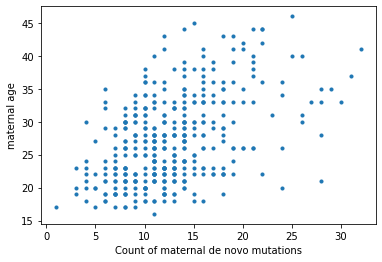

In [44]:
fig, ax = plt.subplots()
area = np.pi*3
plt.scatter(y = df_merge['Mother_age'], x = df_merge['mat_dmn'], s=area)
ax.set_xlabel( "Count of maternal de novo mutations")
ax.set_ylabel( "maternal age")
plt.show()

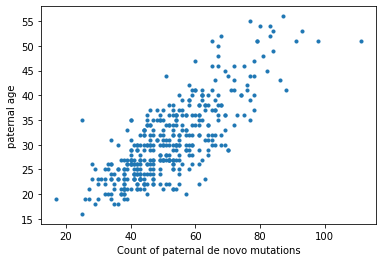

In [45]:
fig, ax = plt.subplots()
area = np.pi*3
plt.scatter(y = df_merge['Father_age'], x = df_merge['pat_dmn'], s=area)
ax.set_xlabel( "Count of paternal de novo mutations")
ax.set_ylabel( "paternal age")
plt.show()

## Question 6

Use ordinary least squares smf.ols() to test for an association between maternal age and maternally inherited de novo mutations.
- Is this relationship significant?
- What is the size of this relationship?

In [62]:
model = smf.ols(formula = "mat_dmn ~ 1 + Mother_age", data = df_merge)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mat_dmn   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           6.88e-24
Time:                        15:23:40   Log-Likelihood:                -1158.1
No. Observations:                 396   AIC:                             2320.
Df Residuals:                     394   BIC:                             2328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5040      0.981      2.553      0.011       0.576       4.432
Mother_age     0.3776      0.035     10.772      0.000       0.309       0.446
==============================================================================
Omnibus:                       51.143   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.501
Skew:                           0.845   Prob(JB):                     4.03e-17
Kurtosis:                       4.310   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Yes, the relationship is significant
the size (slope) of the relationship is 0.6026

## Question 7

Use ordinary least squares smf.ols() to test for an association between paternal age and paternally inherited de novo mutations.
- Is this relationship significant?
- What is the size of this relationship?

In [49]:
model = smf.ols(formula = "Father_age ~ 1 + pat_dmn", data = df_merge)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Father_age   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           1.55e-84
Time:                        14:37:35   Log-Likelihood:                -1191.6
No. Observations:                 396   AIC:                             2387.
Df Residuals:                     394   BIC:                             2395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0178      0.972      7.220      0.000       5.107       8.929
pat_dmn        0.4571      0.018     25.291      0.000       0.422       0.493
==============================================================================
Omnibus:                        3.967   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                3.721
Skew:                           0.226   Prob(JB):                        0.156
Kurtosis:                       3.146   Cond. No.                         212.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Yes, the relationship is significant the size (slope) of the relationship is 0.4571.

## Question 8

Plot a histogram of the number of maternal de novo mutations and paternal de novo mutations per proband on a single plot with semi-transparency.

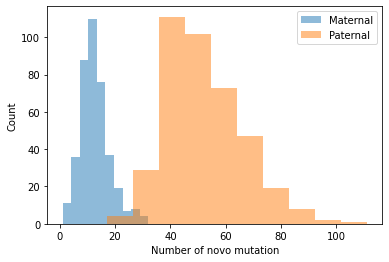

In [65]:
fig, ax = plt.subplots()
ax.hist(df_merge["mat_dmn"], alpha = 0.5, label = 'Maternal')
ax.hist(df_merge["pat_dmn"], alpha = 0.5, label = 'Paternal')
ax.set_xlabel( "Number of novo mutation")
ax.set_ylabel( "Count")
plt.legend()
plt.show()

## Question 9

Test whether the number of maternally inherited de novo mutations per proband is significantly different than the number of paternally inherited de novo mutations per proband.

In [51]:
stats.ttest_ind(df_merge["mat_dmn"], df_merge["pat_dmn"])

Ttest_indResult(statistic=-53.403565287269245, pvalue=2.1986031793078793e-264)

In [52]:
model = smf.ols(formula = "pat_dmn ~ 1 + mat_dmn", data = df_merge)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pat_dmn   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     65.71
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           6.66e-15
Time:                        14:45:37   Log-Likelihood:                -1567.0
No. Observations:                 396   AIC:                             3138.
Df Residuals:                     394   BIC:                             3146.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.1337      1.712     22.855      0.000      35.767      42.500
mat_dmn        1.0079      0.124      8.106      0.000       0.763       1.252
==============================================================================
Omnibus:                       34.430   Durbin-Watson:                   0.273
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.747
Skew:                           0.633   Prob(JB):                     4.28e-11
Kurtosis:                       4.137   Cond. No.                         37.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Question 10

In [66]:
model = smf.poisson(formula = "mat_dmn ~ 1 + Mother_age", data = df_merge)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 2.927974
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                mat_dmn   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                 0.07164
Time:                        15:28:23   Log-Likelihood:                -1159.5
converged:                       True   LL-Null:                       -1248.9
Covariance Type:            nonrobust   LLR p-value:                 8.241e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7671      0.060     29.235      0.000       1.649       1.886
Mother_age     0.0281      0.002     13.582      0.000       0.024       0.032
==============================================================================
"""

In [54]:
model = smf.poisson(formula = "Father_age ~ 1 + pat_dmn", data = df_merge)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 2.997463
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:             Father_age   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                  0.1682
Time:                        14:47:41   Log-Likelihood:                -1187.0
converged:                       True   LL-Null:                       -1427.0
Covariance Type:            nonrobust   LLR p-value:                2.093e-106
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6866      0.035     76.510      0.000       2.618       2.755
pat_dmn        0.0139      0.001     22.411      0.000       0.013       0.015
==============================================================================
"""

In [67]:
model = smf.poisson(formula = "mat_dmn ~ 1 + pat_dmn", data = df_merge)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 3.011762
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                mat_dmn   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                 0.04507
Time:                        15:28:46   Log-Likelihood:                -1192.7
converged:                       True   LL-Null:                       -1248.9
Covariance Type:            nonrobust   LLR p-value:                 2.662e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9885      0.055     36.355      0.000       1.881       2.096
pat_dmn        0.0105      0.001     10.793      0.000       0.009       0.012
==============================================================================
"""

## Question 11

The interpretation of parameter estimates from Poisson regression differs from that of OLS. Using the relevant Poisson regression model that you fit, predict the number of paternal de novo mutations for a proband with a father who was 50.5 years old at the proband's time of birth.

- Hint: use Google to learn about interpreting coefficients from Poisson regression.

In [71]:
father_model = smf.poisson(formula = "Father_age ~ 1 + pat_dmn", data = df_merge).fit
father_model.params

AttributeError: 'function' object has no attribute 'params'

In [60]:
new_pred = pd.DataFrame({"Father_age" : [50.5]})
new_pred

,Father_age
0,50.5


In [69]:
father_model.predict(new_pred)

AttributeError: 'function' object has no attribute 'predict'